# RAG

## 6.0 Introduction
        

- 진행 방식
    - Document GPT APP 생성해볼 것
    - Streamlit을 쓰지는 않을 것이라 투박할 것
    - jupyter notebook으로 먼저 처리하면서 app을 구성하고 채팅으로 만드는 단계 흐름을 알아볼것
    - Streamlit UI 제공
   
- RAG를 알아볼 것임 : Retrieval 
    - 모델은 많은 데이터을 학습하지만, 개인적인 데이터엔 접근불가함(개인DB, 문서)
    - 우리는 RAG를 사용해
        - 우리가 질문을 하면 2개의 일을 하게됨
        - foo가 뭐지? 그 질문을 프롬프트에 전달하면, 그와 관련된 문서를 준비해
        - 저장된 벡터나 검색기를 사용해서 foo가 뭔지를 알아봄
            - 정확히 foo 단어가 있는지 여부를 확인하는 것 + 의미론적으로 분석해서 알아낼것
        - 모델은 foo가 뭔지 모름
        - 그럼 foo와 관련된 문서를 가져올 것
        - 그 문서들을 context로써 우리의 질문과 함께 큰 LM에 보낼 것임
        - 이 모델은 기존에 학습된 수많은 데이터와 함께 우리가 모델이 더 나은 답변을 하기 위해 추가로 전송한 data까지 가지게 됨
        - 이게 RAG임
        - 개인으로 제공된 데이터를 사용하거나 탐색함으로써 우리가 LM의 능력을 더 확장시키는 것
    - 우리는 질문을 할거고, 질문을 할때 우리는 저장된 vector에서 foo와 연관된 자료를 가져와
        - 이때 탐색은 좀 더 복잡한 알고리즘으로 단순히 foo라는 단어가 있는지 여부를 보는 것이 아님
    - 일단 foo에 대한 질문을 할거고 관련 문서를 가져와서 질문과 함께 그 문서들을 프롬프트로 전달할거야
    - 그 뒤에 모델로 해당 프롬프트를 전달할것임
    - 모델은 우리의 질문과 학습된 데이터, 우리가 추가로 보낸 데이터까지 가지게 됨
    - 원한다면 모델에게 우리가 보낸 문서만을 가지고 학습하게 할 수 있음
    - 왜냐면 우리 문서가 더 최신 데이터를 가지고있을 수 있음
    - 이게 RAG임

- RAG 방식 중 "stuff  document" 방식
    - RAG 방식은 다양하고, 모든 문서를 프롬프트에 넣ㄱ 모델로 전달하는 방식은 stuff
    - ![image.png](attachment:image.png)
- 그 외, Refine/Map Reduce 방식 같은 걸 응용할 것
- 얼마나 문서를 많이 갖고있는지, 얼마만큼의 비용을 감당할지, 어떤 모델을 사용할지등에 따라 달라짐
- 일단 쥬피터 노트북에서 대략적으로 진행하고 streamlit을 사용해서 쥬피터에서 작성한 document GPT를 멋진 UI로 가지게 변환할 것
    

## 6.1 Data Loaders and splitters

- RAG의 첫번째 단계 : Retrieval을 알아볼 것
- 랭체인 모듈인데, 
    - 소스데이터가 있고
    - 로더가 있고, 데이터를 로드하고 데이터를 변환할거임(데이터를 분할할거임)
        - 나중에 임베드하기 위해 분할할거임
    - 왜 임베드를 해야하는지, 뭘할지 알아볼것임
    - 데이터를 retrieval를 하는 과정임
    - 어떤 소스에서 데이터를 로드하고, 데이터를 변환하고 이럴 임베드한다(컴퓨터가 이해할 수있도록 숫자로 변환), 이 숫자를 저장해뒀다가 나중에 특정숫자를 검색함
- Embed, Store, Retrieve 과정은 나중에 하고 이번 강의에선 안할거야
    - 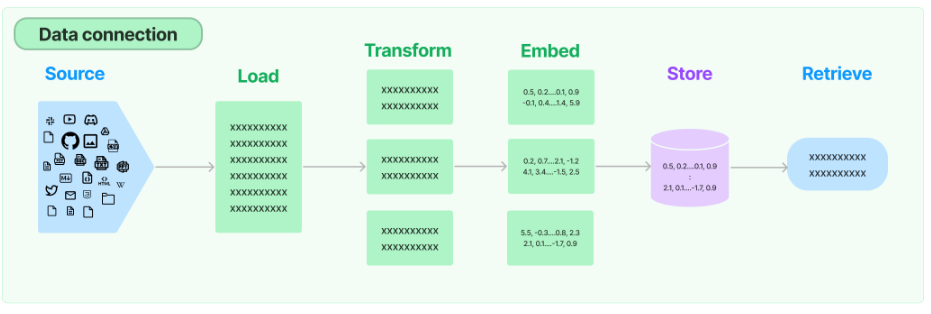

- 랭체인 홈피 : https://js.langchain.com/v0.1/docs/modules/data_connection/
    - 예전버전 1.0 / 현재는 최신 업데이트됨
    - 다양한 documents loader가 있는데, file이나 web file 등을 load할 수 있음
        - pdf, figma, ppt, notion, github, s3 file, slack 메세지 등등 정말 많은 다큐먼트 로더가 있음
    - 해당 로더로 다큐먼트를 읽어서 하나의 랭체인 문서에 집어넣음
    
    

- UnstructuredFileLoader 지원 파일 타입
- 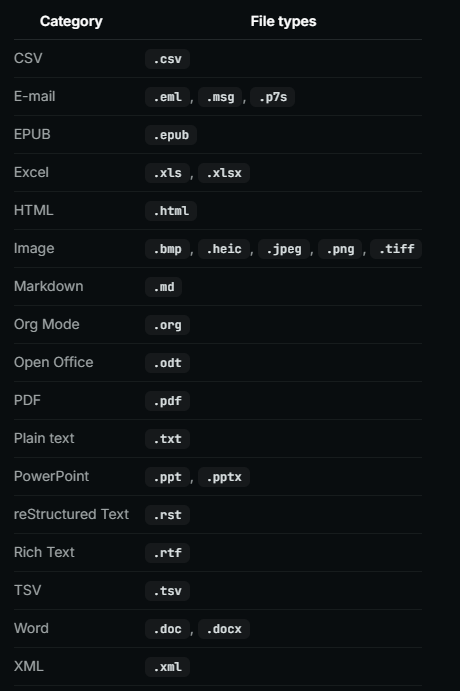
- https://docs.unstructured.io/welcome

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader

loader = UnstructuredFileLoader("./files/chapter-one.txt") 
document = loader.load()
document

- 문서가 너무 커서 분할해줘야함
- 질문에 답해야할때, 필요한 파일의 부분들만 전달해줘야함
- 특정 문자열 중 하나를 찾는다고하면, 이 문자열을 갖고있는 문서만 언어모델에 주면 되는 것임
- 즉 문서의 문자를 분할해서 작은 조각으로 분할해주고, 프롬프터도 짧아지고 LLM에게 필요한 부분만 줄 수있음
 

In [ ]:
# split document
len(document) # 1개 / [Document(...] Document로 이뤄진 리스트인데, 전체 챕터가 하나의 문서에 들어있음

# 아주 일반적인 text splitter
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter() # 문장/문단 기준으로 끊어주기/ 문장 중간에서 분할하지 않도록 하는 것이 목적으로 중간에 잘려서 의미있는 문장을 잃지않게 함
loader = UnstructuredFileLoader("./files/chapter-one.txt") 

# 첫번째 방법
docs=loader.load()
splitter.split_documents(docs)

# 두번째 방법
len(loader.load_and_split(text_splitter=splitter)) # 4개로 분할함함
loader.load_and_split(text_splitter=splitter) # 단순히 파이썬 함수로 분할한게 아니고, 문장과 문단 구조를 유지하면서 문서를 나눈 것



In [ ]:
# split document
len(document) # 1개 / [Document(...] Document로 이뤄진 리스트인데, 전체 챕터가 하나의 문서에 들어있음

# 아주 일반적인 text splitter
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50 # 문장아니 문단 불할때 앞 문단을 약간 가져오면서 앞조각의 끝부분을 조금 가져와서 다음 조각에 연결하면서 문서에 중복이 생기게 됌
    
) # 문장/문단 기준으로 끊어주기/ 문장 중간에서 분할하지 않도록 하는 것이 목적으로 중간에 잘려서 의미있는 문장을 잃지않게 함
loader = UnstructuredFileLoader("./files/chapter-one.docx") 

# 두번째 방법
print(len(loader.load_and_split(text_splitter=splitter))) # 211 분할함 -> 더 작게 분할하지만 문장 구조를 무시하면서 잘라먹음(chunk_size 옵션만 줬을때)
loader.load_and_split(text_splitter=splitter) # 단순히 파이썬 함수로 분할한게 아니고, 문장과 문단 구조를 유지하면서 문서를 나눈 것



In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader
from langchain.text_splitter import CharacterTextSplitter

splitter = CharacterTextSplitter(separator="\n", chunk_size=600, chunk_overlap=100)  # separator : 특정문자열 \n 등을 찾아서 분할하는 것 (예를 들어, ---가 있으면 이걸 기준으로 자름름)
loader = UnstructuredFileLoader("./files/chapter-one.pdf") 

print(len(loader.load_and_split(text_splitter=splitter))) # 10개로 분할함
loader.load_and_split(text_splitter=splitter) # 단순히 파이썬 함수로 분할한게 아니고, 문장과 문단 구조를 유지하면서 문서를 나눈 것



## 6.2 Tiktoken
- splitter는 문장을
표준 len 함수를 사용해서 chuck를 만들지는 않음

- length_function = len   
- 표준 자리브러리의 len 함수를 써서 문자의 개수를 반환해줄 것
- LLM은 tocken을 같은 방법으로 세진않음 token은 letter와 다른 의미임
- 문자 3개, 4개를 하나의 token으로 취급함
    - tokenizer openAI 홈페이지 참고
        - https://platform.openai.com/tokenizer
        - 모델 관점에서 우리가 토큰을 얼마나 사용하는지 알려줌
        - 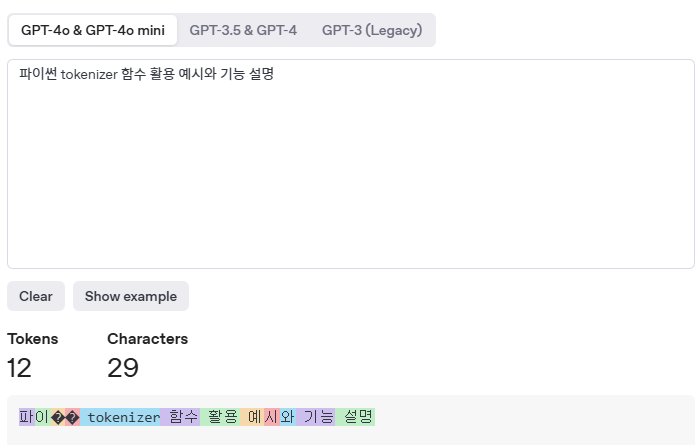
    - 토큰과 문자열이 서로 다름을 확인
    - 언어모델은 hello를 하나의 토큰으로 취급하지만 문자열로는 5임
        - 띄어쓰기까지 같이 묶어서 토큰으로 구분하는 것도 확인가능
    - token id를 보면, 모델이 바라보는 id 확인가능
    - 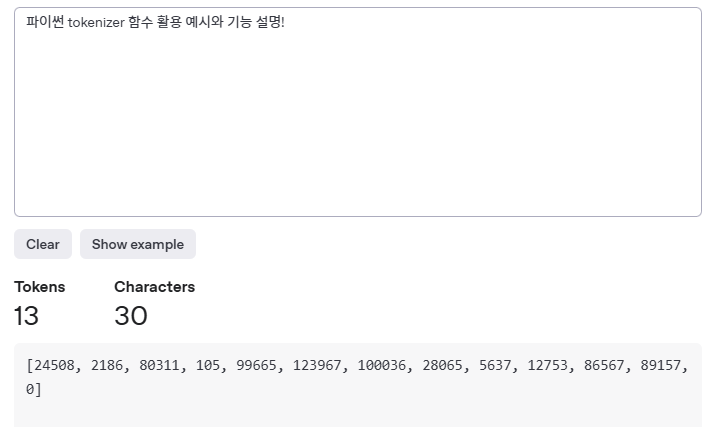
        - 모델은 id를 봄
            - 내가 입력한 문장에 대한 id값이 보여짐
        - 지금 gpt가 몇개의 토큰을 포함하는지 아는건 불가능함
        - !가 첫번째 토큰같음= 0으로 들어감
    - 어떤 id 뒤에 어떤 id의 토큰이 온다고 학습되어있을수있음
- 이러한 토큰화를 splitter에서 하는 방식 배우기
    - from_tiktoken_encoder()
    - package 링크(위의 tiktoken 페이지 내 링크) : https://github.com/openai/tiktoken
    - tictoken은 openai에 만듬
    - from_tiktoken_encoder 을 실행시킬때 뒷 배경에서 돌아가는 패키지임(랭체인이 이런걸 가능하게 함)

    

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader
from langchain.text_splitter import CharacterTextSplitter

# 파이썬이 제공하는 기본 문자열 세는 함수 : len
    # length_function=len 옵셥을 추가할 수 있음
# 이것보단 모델이 텍스트를 세는 방식(token)으로 설정하고싶다면
'''
splitter = CharactertSplitter(
    separator="\n", 
    chunk_size=600, 
    chunk_overlap=100,   
    length_function=len
)
'''
# 모델에는 limit이 있어서 원하는 텍스트들을 모두 한번에 입력할 수 없으므로 길이를 계산할때 모델과 같은 방법으로 하는게 좋음
# from_tiktoken_encoder 을 이용하는 방식을 사용하면 모델이 텍스트를 세는 방법과 우리(우리의 코드)가 텍스트 세는 방식이 같음(모델은 token으로 셈)
splitter = CharacterTextSplitter.from_tiktoken_encoder(
    separator="\n", 
    chunk_size=600, 
    chunk_overlap=100,
)
loader = UnstructuredFileLoader("./files/chapter-one.pdf")

# print(len(loader.load_and_split(text_splitter=splitter)))
loader.load_and_split(text_splitter=splitter)


## 6.3 vectors

- 데이터를 load하고, transform까지 진행했으므로 이제 Embed 단계가 필요함
    - transform : 데이터를 chunk로 분할한다는 것
- 쉽게말하면, 사람이 읽는 텍스트를 컴퓨터가 이래할수있는 숫자로 변환하는 작업
- 벡터 : vectorization : 문서마다 각각의 벡터를 만듬
    - split처리해준 문서마다 embed를 할거인데
    - 최소 1000차원 벡터를 제공함
    - 3D벡터만 생각했을때, 몇단어를 embed하는것을 연습하자 
    
- 각 단어가 해당 특성을 얼마나 반영하는지 평가하여 점수를 매김

벡터가 천개 이상의 차원을 가지는게 대단함/ 상상할 수 있는 모든것에 차원을 부여할 수 있음
- 부유함, 성실함, 등등등

```
      Masculinty | Femininity| Royalty
king  | 0.9      |       0.1 | 1.0
queen | 0.1      |       0.9 | 1.0
man   | 0.9      |       0.1 | 0.0
royal   | 0.0      |       0.0| 1.0
woman   | 0.1     |       0.9| 0.0
```

```
??? = royal + woman 
       | 0.1 | 0.9 | 1.0 # 이렇게 계산된다면 queen이라는 결과를 확인할 수 있음
```
- 단어를 숫자로 치환했기 때문에, 단어끼리 연산을 할 수 있음
- 이런 작업을 진행 : 모든 문서들을 숫자로 치환
- 벡터에 대한 검색 작업이 가능해짐
- 비슷한 벡터를 찾을 수 있음
    - 벡터간 가깝다고 계산
    - 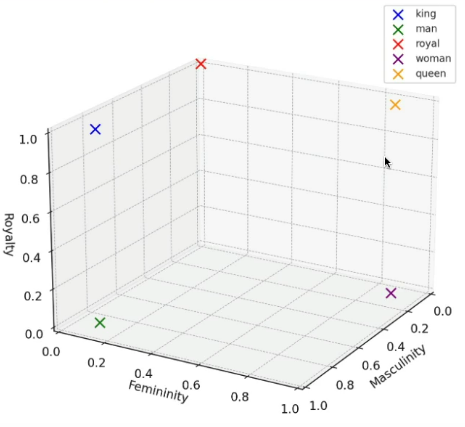
    - 추천 검색이 비슷함 = 영화 : 배우, 주제, 등등을 가지고 어떤 영화끼리 서로 가까운지 계산할 수 있음

- 만약 새로운 단어를 연관시키고 싶다면?
    - 예를 들어 "기사" Kinght
    - 3D 좌표에서 어디가 될까? 
        - 나이트는 남성성이 왕보다 높고, 로얄티는 조금 낮고, 여성성은 낮겠지 
        - 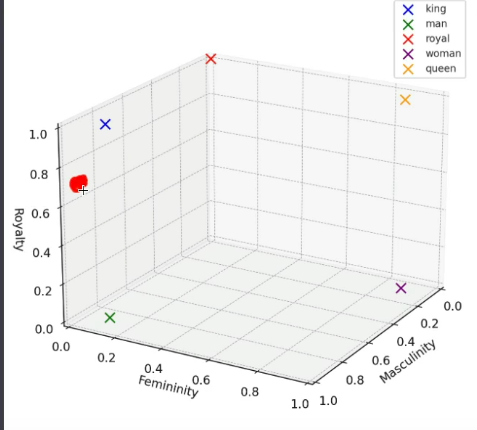
    - 이런식으로 단어에 숫자를 부여하는 것의 장점
- 이런 계산을 해주는 웹사이트 : https://turbomaze.github.io/word2vecjson/
    - 내가 입력한 단어와 비슷한 벡터를 보여줌
    - 기본적으로 벡터공간에서 가까운 단어
        - 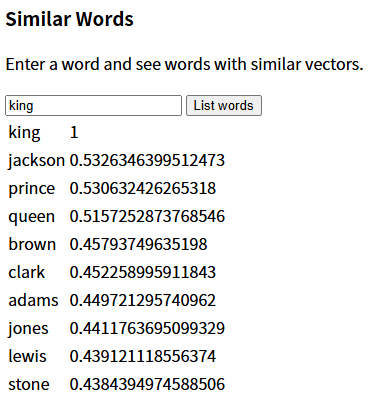
    - 단어간 계산해줌 : 단어 선형대수
        - 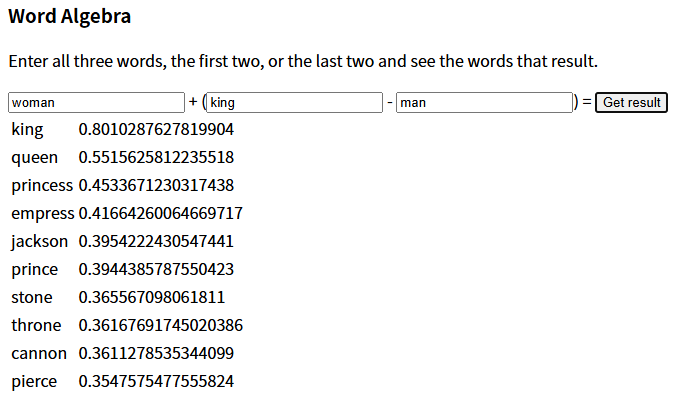
    - 해당 링크 하단의 "Fork me" 를 들어가면 좀더자세한 설명과 git이있음
        - https://github.com/turbomaze/word2vecjson
    
- 벡터를 사용해서 비슷한 문서들을 검색해
    - RAG를 사용할때 연관성 높은 문서를 LLM에 전달해
- 우리는 질문에 대한 대답을 받을 수 있음

### 유용한 유튜브
- Gustav Soderstrom 영상
- LLM이 어떻게 작동하는지 설명이 좋음(약 90분)
- 흔히 나오는 예제로 벡터를 설명하고 스포티파이가 어떻게 음악을 추천해주는지 설명해줌



       


## 6.4 Vector Store

- embed model
- openAI가 가지고있고 랭체인이 지원하는 모델임
- 

In [ ]:
from langchain.embeddings import OpenAIEmbeddings

embedder = OpenAIEmbeddings()
embedder.embed_query("Hi") # "Hi"를 나타내는 벡터

# 이 차원이 몇개인지 확인
vector = embedder.embed_query("Hi")
print(len(vector)) # 1536 차원 

# 여러개를 할수있음
vector = embedder.embed_documents(
    ["Hi", 'how','are','you','longer sentense because'] # 꼭 하나의 단어일 필요없음(어차피 실제 embed 대상은 문서)
)
print(len(vector)) # 5개의 벡터 - 내가 입력해준 5개의 문서에 각각 할당된 걸거임

# 각가 같은 차원을 갖고있음
print(len(vector), len(vector[0])) # 5 1536 => 우리는 5개의 벡터가 있고, 각 벡터는 1536개의 차원을 갖고있음음

5
5 1536


In [ ]:
직접문서 embed를 수행하고싶진않음

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import UnstructuredFileLoader
from langchain.text_splitter import CharacterTextSplitter


splitter = CharacterTextSplitter.from_tiktoken_encoder(
    separator="\n", 
    chunk_size=600, 
    chunk_overlap=100,
)
loader = UnstructuredFileLoader("./files/chapter-one.pdf")
loader.load_and_split(text_splitter=splitter)
